### Matplotlib gantt experimentation

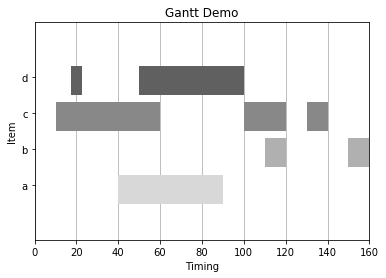

In [89]:
import matplotlib.pyplot as plt

def generate_gantt(data, title, xlabel="", ylabel=""):
    
    fig, ax = plt.subplots()
    
    width = 8
    gap = 1
    total_bar_width = width+gap*2
    
    data_length = len(data)
    
    # Grabbing max value - FUTURE probably a cleaner way to do this
    xlim = 0
    for key in sample_data:
        for value_pair in sample_data[key]:
            lim = sum(value_pair)
            if lim > xlim:
                xlim = lim
    
    ax.set_ylim(0, total_bar_width*(data_length+2)) 
    ax.set_xlim(0, xlim)

    ax.set_xlabel(xlabel) 
    ax.set_ylabel(ylabel)
    
    ax.set_title(title)

    # set tick at halfway point of bar width & label
    yticks = [float(total_bar_width)*1.5 + _*total_bar_width for _ in range(data_length)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(data.keys())
    
    ax.grid(True, axis='x', zorder=1)
    
    for i, item in enumerate(data):
        offset = (total_bar_width)*(i+1)
        ax.broken_barh(data[item], (offset, width), zorder=2,
                       # FUTURE find a better way to do this with colormap...
                       facecolors=str((xlim/data_length)*(i+1))) 
    plt.show()
    
    
sample_data = {
    "a":[(40, 50)],
    "b":[(110, 10), (150, 10)],
    "c":[(10, 50), (100, 20), (130, 10)],
    "d":[(17.5, 5), (50, 50)]
}
    
generate_gantt(sample_data, "Gantt Demo", "Timing", "Item")